# Section 34 Support Vector Machine:

#### Lecture 208/9 The Main Idea 1 & 2
#### Lecture 210 Data Preprocessing and Visualisation
#### Lecture 211 Eigen Faces
#### Lecture 212 Fit the SVM
#### Lecture 213 Look at Our Predictions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from scipy.stats import loguniform

warnings.filterwarnings('ignore')

## Facial Recognition with Support Vecgtor Machine
##### Labeled Faces in the Wild with Support Vector Machine
##### Public Figures Faces Labelled by Humans
##### All Colours Removed and Greyscaled (Monochrome Image)
##### 13000 Plus Images
##### Each Image 125 x 94 px

In [2]:
faces = fetch_lfw_people(min_faces_per_person=30, resize=None)

In [3]:
faces.target_names

array(['Alejandro Toledo', 'Alvaro Uribe', 'Andre Agassi', 'Ariel Sharon',
       'Arnold Schwarzenegger', 'Colin Powell', 'David Beckham',
       'Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder',
       'Gloria Macapagal Arroyo', 'Guillermo Coria', 'Hans Blix',
       'Hugo Chavez', 'Jacques Chirac', 'Jean Chretien',
       'Jennifer Capriati', 'John Ashcroft', 'John Negroponte',
       'Junichiro Koizumi', 'Kofi Annan', 'Laura Bush', 'Lleyton Hewitt',
       'Luiz Inacio Lula da Silva', 'Megawati Sukarnoputri',
       'Nestor Kirchner', 'Recep Tayyip Erdogan', 'Roh Moo-hyun',
       'Serena Williams', 'Silvio Berlusconi', 'Tom Ridge', 'Tony Blair',
       'Vicente Fox', 'Vladimir Putin'], dtype='<U25')

In [4]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [5]:
faces.data.shape

(2370, 11750)

In [6]:
125*94

11750

In [7]:
faces.images.shape

(2370, 125, 94)

In [8]:
faces.target

array([ 8,  4, 21, ...,  8, 10,  8], dtype=int64)

In [9]:
faces.target_names

array(['Alejandro Toledo', 'Alvaro Uribe', 'Andre Agassi', 'Ariel Sharon',
       'Arnold Schwarzenegger', 'Colin Powell', 'David Beckham',
       'Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder',
       'Gloria Macapagal Arroyo', 'Guillermo Coria', 'Hans Blix',
       'Hugo Chavez', 'Jacques Chirac', 'Jean Chretien',
       'Jennifer Capriati', 'John Ashcroft', 'John Negroponte',
       'Junichiro Koizumi', 'Kofi Annan', 'Laura Bush', 'Lleyton Hewitt',
       'Luiz Inacio Lula da Silva', 'Megawati Sukarnoputri',
       'Nestor Kirchner', 'Recep Tayyip Erdogan', 'Roh Moo-hyun',
       'Serena Williams', 'Silvio Berlusconi', 'Tom Ridge', 'Tony Blair',
       'Vicente Fox', 'Vladimir Putin'], dtype='<U25')

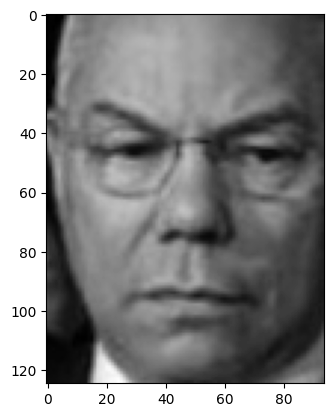

In [10]:
plt.imshow(faces.images[1027], cmap='gray')

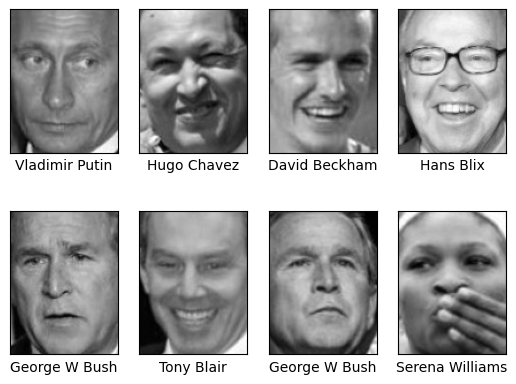

In [11]:
fig, splits = plt.subplots(2, 4)
for i, splts in enumerate(splits.flat):
    n = np.random.randint(1, faces.data.shape[0])
    splts.imshow(faces.images[n], cmap = 'gray')
    splts.set(xticks=[], yticks = [], xlabel = faces.target_names[faces.target[n]])
splts.figure.savefig(r'output/PicsSubplot.png')

#### Step 3:  Data Preprocessing
##### Split
##### Scale

In [12]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.4)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_test.shape

(948, 11750)

In [15]:
X_train.shape

(1422, 11750)

### Step 4 Lecture 211 Eigen Faces
##### Dimension Reduction
###### PCA
###### Down to 150 Dimensions.  Usual when using this dataset.
###### Show Eigen Faces

In [16]:
# PCA:

pca = PCA(n_components=150).fit(X_train)

In [17]:
pca.explained_variance_ratio_

array([0.27768534, 0.11875056, 0.07063054, 0.04656135, 0.02638332,
       0.02369807, 0.0185187 , 0.01720936, 0.015772  , 0.01415748,
       0.01379238, 0.01195488, 0.01153227, 0.01008545, 0.00884507,
       0.00838844, 0.00781689, 0.00693915, 0.00661809, 0.00629804,
       0.00593674, 0.00545848, 0.00526217, 0.00500756, 0.00478443,
       0.0044603 , 0.0043352 , 0.00403302, 0.00389548, 0.00378256,
       0.00367484, 0.00360206, 0.00346433, 0.003316  , 0.00324223,
       0.00309821, 0.0030075 , 0.00288139, 0.00288004, 0.00279977,
       0.00273304, 0.00267561, 0.00261006, 0.00255979, 0.00246303,
       0.00234399, 0.00227466, 0.00222545, 0.00213491, 0.00212566,
       0.00208735, 0.00203816, 0.00197182, 0.00194225, 0.00189257,
       0.00184305, 0.0018173 , 0.00176728, 0.00173083, 0.00167992,
       0.00167124, 0.00162269, 0.00159841, 0.00156318, 0.00151657,
       0.001507  , 0.00149463, 0.00148394, 0.00143373, 0.00141908,
       0.00139775, 0.00135534, 0.0013087 , 0.00129914, 0.00129

In [19]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [20]:
X_train_pca.shape

(1422, 150)

In [21]:
X_test_pca.shape

(948, 150)

In [22]:
pca.components_.shape

(150, 11750)

In [25]:
# Plot Eigen Faces firstly make the 1d array 2d
eigenfaces = pca.components_.reshape(150, 125, 94)
fig, subplots = plt.subplots(2, 5)
for i, plot in enumerate(subplots.flat):
    plot.imshow(eigenfaces[i])
plt.savefig(r'output/EigenFaces.png')
plt.close()

### Lecture 212 Fit the SVM

#### Step 5 Fit the SVM
##### Define Hyper-Params Grid - C and Ganna
##### Fit the Model
##### Predictions
##### Confusion Matrix
##### Classification Report

In [26]:
# Firstly construct a paramater grid to use for the choosing C(ost) - too high bad as will overfit the data, too low will increase error in predictions
# Then the Gamma same applies as above

para_grid = {
    "C":[0.001, 0.1, 1, 10, 100, 1000],
    "gamma": [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

In [27]:
grid = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'),
    para_grid,
    cv=5
)
grid.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]})

In [28]:
grid.best_estimator_

SVC(C=10, class_weight='balanced', gamma=0.0001)

In [29]:
# class_weight='balanced' weights the model towards recognising the most frequent faces and gives less weight to those that appear less.

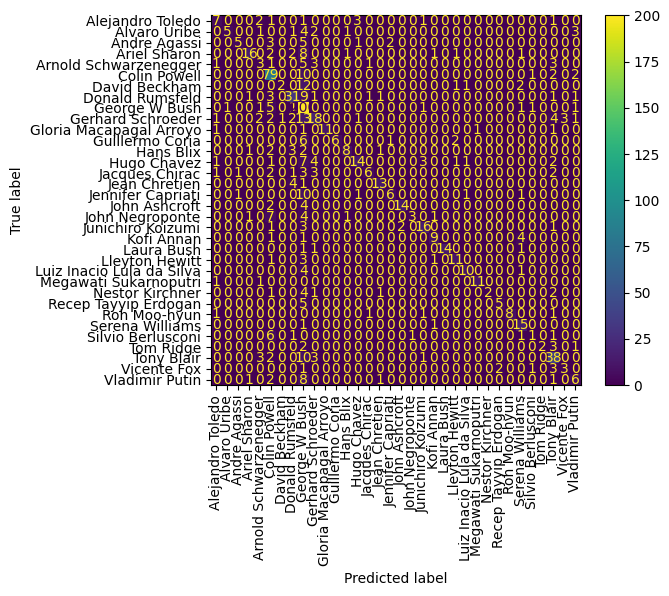

In [33]:
# Print the confusion matrix:

ConfusionMatrixDisplay.from_estimator(
    grid, X_test_pca,
    y_test,
    display_labels=faces.target_names,
    xticks_rotation = 'vertical'
)
plt.tight_layout
plt.savefig(r'output/ConfusionMatixCrowded.png')

In [37]:
# Instead we could use the Report:

y_pred = grid.predict(X_test_pca)

In [38]:
print(classification_report(y_test, y_pred, target_names=faces.target_names))

                           precision    recall  f1-score   support

         Alejandro Toledo       0.50      0.44      0.47        16
             Alvaro Uribe       0.83      0.29      0.43        17
             Andre Agassi       0.71      0.31      0.43        16
             Ariel Sharon       0.80      0.50      0.62        32
    Arnold Schwarzenegger       0.23      0.18      0.20        17
             Colin Powell       0.64      0.84      0.72        94
            David Beckham       0.67      0.11      0.19        18
          Donald Rumsfeld       0.67      0.63      0.65        49
            George W Bush       0.57      0.94      0.71       212
        Gerhard Schroeder       0.50      0.38      0.43        48
  Gloria Macapagal Arroyo       1.00      0.73      0.85        15
          Guillermo Coria       1.00      0.40      0.57        15
                Hans Blix       0.73      0.47      0.57        17
              Hugo Chavez       0.70      0.41      0.52     

In [39]:
grid.score(X_test_pca, y_test)

0.630801687763713

#### Step 6 Visualise the Results:

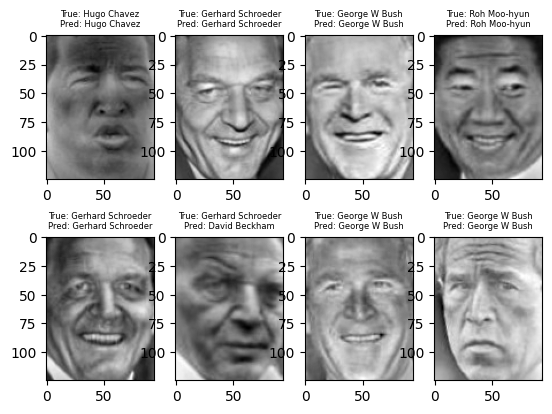

In [43]:
fog_2, subplots_2 = plt.subplots(2, 4)
for i, plot in enumerate(subplots_2.flat):
    n = np.random.randint(1, len(y_pred))
    plot.imshow(X_test[n].reshape(125, 94), cmap='gray')
    plot.set_title(f'True: {faces.target_names[y_test[n]]}\nPred: {faces.target_names[y_pred[n]]}', fontsize=6)
plt.savefig(r'output/FacesPredVsActual.png')